###Contours(윤곽선)를 찾기
### Convex Hull

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_image(title, img, cmap=None):
  plt.figure(figsize=(5, 5))
  if len(img.shape) == 2:
    plt.imshow(img, cmap=cmap if cmap else 'gray')
  else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
  plt.title(title)
  plt.axis('off')
  plt.show()

#cv2.drawContours



```
output = cv2.drawContours(
   image, # 윤곽선을 그릴 대상 이미지(BGR)
   contours, # 찾은 윤곽선 리스트
   contourIdx,# -1이면 모든 윤곽선을 그림
   color,
   thickness
   )```



Number of contours found: 1


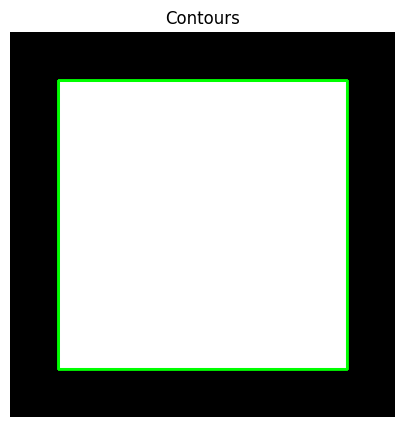

In [8]:
image = np.zeros((400, 400), dtype = np.uint8())

cv2.rectangle(image, (50, 50), (350, 350), 255, -1)

contours, hierarchy = cv2.findContours(
    image.copy(),
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

print(f"Number of contours found: {len(contours)}")

output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(
    output,
    contours,
    -1,
    (0, 255, 0),
    2
)

show_image('Contours', output)

##사각형 외곽

### 윤곽선으로부터 가장 작은 사각형 영역을 구함. 이때, cv2.boundingRect(contour)을 사용

```
x, y, w, h = cv2.boundingRect(contour)
```

*   (x, y)는 사각형의 왼쪽 위 꼭짓점 좌표
*   w, h는 사각형의 너비와 높이
직교괸 사각형이므로 이미지축에 평행



BoundingRect -> x : 50, y: 50, w: 301, h: 301


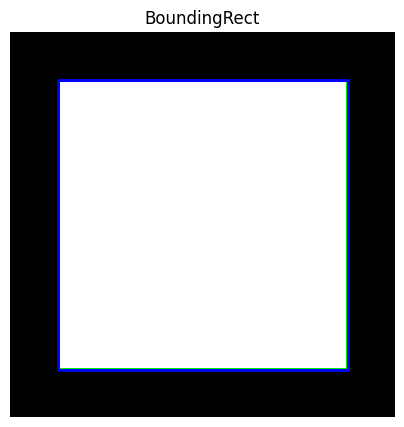

In [9]:
contour = contours[0]

x, y, w, h = cv2.boundingRect(contour)
print(f"BoundingRect -> x : {x}, y: {y}, w: {w}, h: {h}")

output_rect = output.copy()
cv2.rectangle(output_rect, (x, y), (x + w, y + h), (255, 0, 0), 2)
show_image('BoundingRect', output_rect)

###Convex hull
- 윤곽선의 점들을 모두 포함하는 볼록 다각형(Convex polygon)중 가장 작은 것을 Convex hull이라고 한다.


```
hull = cv2.convexHull(contour)
#hull은 점들의 집합을 반환한다. 이를 drawContours로 시각화할 수 있음
```



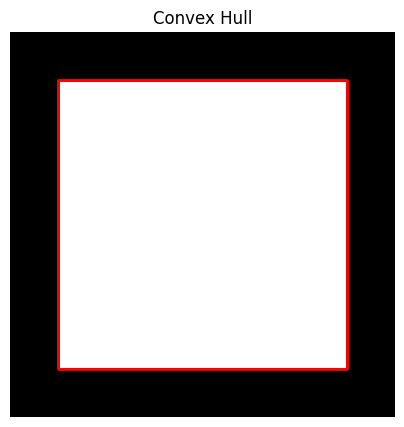

In [10]:
hull = cv2.convexHull(contour)

output_hull = output.copy()
cv2.drawContours(output_hull, [hull], -1, (0, 0, 255), 2)
show_image('Convex Hull', output_hull)

### 유사 다각형 근사


```
approx = cv2.approxPolyDP(contour, epsilon, closed)
```


*  cv2.approxPolyDP() 함수는 더 적은 점으로 윤곽선을 근사화 한다.
*  윤곽선의 직선 구간이 많은 경우 점을 크게 줄여 효율적인 표현이 가능하게 한다.



*   epsilon : 근사 오차(정밀도) 파라미터, epsilon이 클수록 점이 더 많이 생략
*   closed : 윤곽선이 닫혀있는지 여부를 확인






Number of points in original contour : 4
Number of points in approximated contour : 4


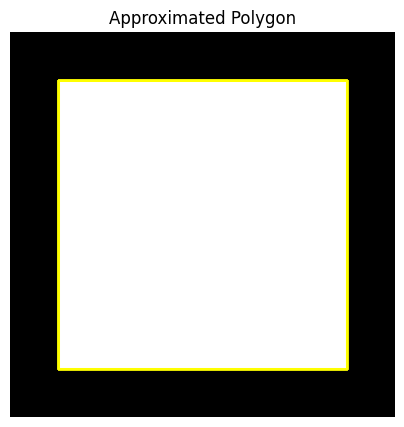

In [11]:
epsilon = 0.02 * cv2.arcLength(contour, True) #윤곽선의 길이에 대한 비율로 epsilon 값을 설정
approx = cv2.approxPolyDP(contour, epsilon, True) #contour의 점들을 epsilon에 따라 적은 수의 점들로 변환하여 반환

print("Number of points in original contour :", len(contour))
print("Number of points in approximated contour :", len(approx))

output_approx = output.copy()
cv2.drawContours(output_approx, [approx], -1, (0, 255, 255), 2)

show_image("Approximated Polygon", output_approx)


*   m10 (X 방향 1차 모멘트)
*   m01 (Y 방향 1차 모멘트)
*   m00 (영역 모멘트)

```
m10 / m00 → X 좌표의 중심

m01 / m00 → Y 좌표의 중심

m10 = 50000, m01 = 75000, m00 = 1000이라면:
      무게 중심(Centroid)은 (50, 75)이 됩니다.
```



In [12]:
area = cv2.contourArea(contour)
perimeter = cv2.arcLength(contour, True)
moments = cv2.moments(contour)

print("Contour Area :", area)
print("Contour Perimeter :", perimeter)
print("Contour Moments :", moments)

if moments['m00'] != 0:
  cx = int(moments['m10'] / moments['m00'])
  cy = int(moments['m01'] / moments['m00'])
  print(f"Centeroid:  ({cx}, {cy})")
else:
  print("Centeroid: None")

Contour Area : 90000.0
Contour Perimeter : 1200.0
Contour Moments : {'m00': 90000.0, 'm10': 18000000.0, 'm01': 18000000.0, 'm20': 4275000000.0, 'm11': 3600000000.0, 'm02': 4275000000.0, 'm30': 1125000000000.0, 'm21': 855000000000.0, 'm12': 855000000000.0, 'm03': 1125000000000.0, 'mu20': 675000000.0, 'mu11': 0.0, 'mu02': 675000000.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.08333333333333334, 'nu11': 0.0, 'nu02': 0.08333333333333334, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
Centeroid:  (200, 200)


##과제

Number of contours found: 3


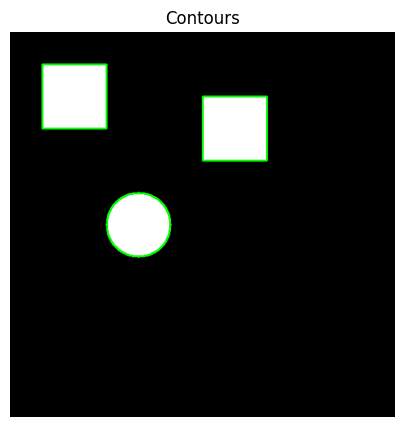

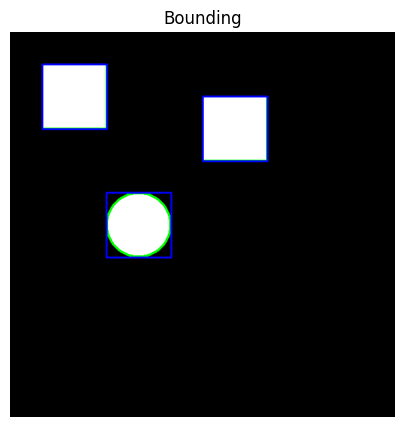

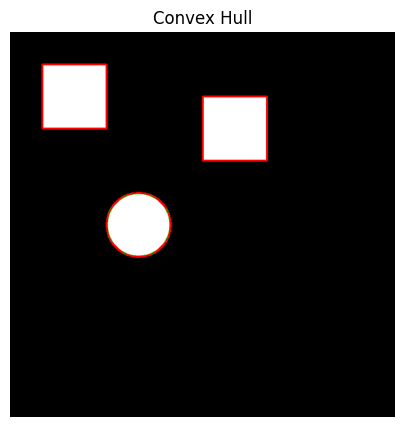

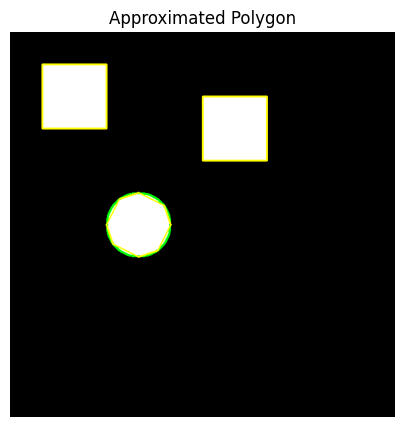

In [13]:
#1. 다중 객체 이미지에서의 Contours 처리
#여러 개의 도형(원, 사각형 등)을 그린 이미지를 만들고, 윤곽선을 찾아서 각각에 대한 bounding box, convex hull 등을 시도해 보세요.
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = np.zeros((600, 600), dtype=np.uint8)
cv2.rectangle(image, (50, 50), (150, 150), 255, -1)
cv2.rectangle(image, (300, 100), (400, 200), 255, -1)
cv2.circle(image, (200, 300), 50, 255, -1)

contours, hierarchy = cv2.findContours(
    image.copy(),
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

print(f"Number of contours found: {len(contours)}")

output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

show_image("Contours", output)

output_bounding_box = output.copy()
output_hull = output.copy()
output_approx = output.copy()

for i in range (len(contours)):
  contour = contours[i]
  x, y, w, h = cv2.boundingRect(contour)
  cv2.rectangle(output_bounding_box, (x, y), (x+w, y+h), (255, 0, 0), 2)

  hull = cv2.convexHull(contour)
  cv2.drawContours(output_hull, [hull], -1, (0, 0, 255), 2)

  epsilon = 0.02 * cv2.arcLength(contour, True)
  approx = cv2.approxPolyDP(contour, epsilon, True)

  cv2.drawContours(output_approx, [approx], -1, (0, 255, 255), 2)

show_image("Bounding", output_bounding_box)
show_image("Convex Hull", output_hull)
show_image("Approximated Polygon", output_approx)

Contour 1 Area: 21000.0
Contour 2 Area: 15000.0
Contour 3 Area: 13000.0


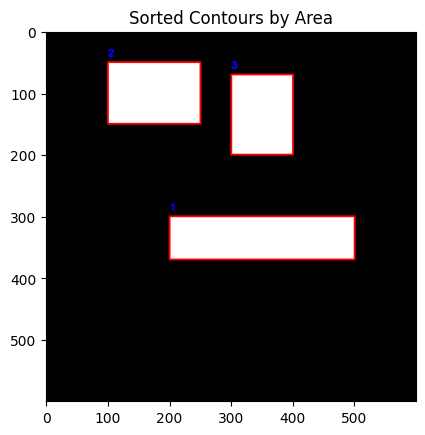

In [14]:
#2. Contour 정렬
#다중 윤곽선을 찾은 뒤, x좌표나 면적 등을 기준으로 정렬하여 나열해 보세요.

import numpy as np
import cv2
import matplotlib.pyplot as plt

image = np.zeros((600, 600), dtype=np.uint8)
rec1 = cv2.rectangle(image, (100, 50), (250, 150), 255, -1)
rec2 = cv2.rectangle(image, (300, 70), (400, 200), 255, -1)
rec3 = cv2.rectangle(image, (200, 370), (500, 300), 255, -1)

contours, hierarchy = cv2.findContours(
    image.copy(),
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

contours = sorted(contours, key=cv2.contourArea, reverse=True)

for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    print(f"Contour {i + 1} Area: {area}")

output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for i, contour in enumerate(contours):
    cv2.drawContours(output, [contour], -1, (255, 0, 0), 2)
    x, y, w, h = cv2.boundingRect(contour)
    cv2.putText(output, f"{i + 1}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

plt.imshow(output)
plt.title("Sorted Contours by Area")
plt.show()

Number of contours found: 289


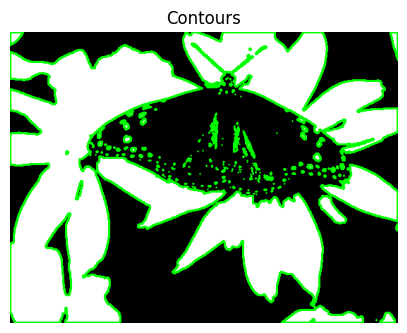

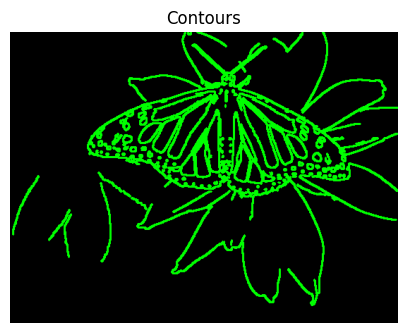

In [20]:
#3. 실제 이미지 사용
#Threshold, Canny 에지 검출 등을 적용하여 Contours를 찾고, 물체 외곽을 탐지해 보세요.

import cv2
import matplotlib.pyplot as plt
import numpy as np

!wget -O gray_image.jpg "https://blog.aspose.cloud/ko/imaging/grayscale-image-in-java/images/grayscale.jpg" -q


image = cv2.imread("gray_image.jpg", cv2.IMREAD_GRAYSCALE)

threshold_value = 127
max_value = 255

ret, thres_binary = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)
edges = cv2.Canny(image, 100, 200)

contours1, hierarchy1 = cv2.findContours(
    thres_binary.copy(),
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE
)

contours2, hierarchy2 = cv2.findContours(
    edges.copy(),
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE
)
print(f"윤곽선 개수 : {len(contours)}")

output1 = cv2.cvtColor(thres_binary, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output1, contours1, -1, (0, 255, 0), 2)
show_image("threshold Contours", output1)

output2 = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output2, contours2, -1, (0, 255, 0), 2)
show_image("Contours", output2)

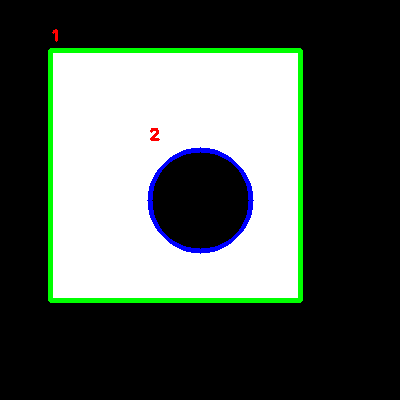

In [28]:
#4. 자세한 계층 구조(hierarchy) 분석
#hierarchy 를 이용해 부모-자식 윤곽선을 구분하는 로직을 작성
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = np.zeros((400, 400), dtype=np.uint8)
cv2.rectangle(image, (50, 50), (300, 300), 255, -1)
cv2.circle(image, (200, 200), 50, 0, -1)

contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

for i, (next_, prev, child, parent) in enumerate(hierarchy[0]):
    color = (0, 255, 0) if parent == -1 else (255, 0, 0)
    cv2.drawContours(output, [contours[i]], -1, color, 3)

    x, y, w, h = cv2.boundingRect(contours[i])
    cv2.putText(output, f"{i + 1}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

cv2_imshow(output)
cv2.waitKey(0)
cv2.destroyAllWindows()

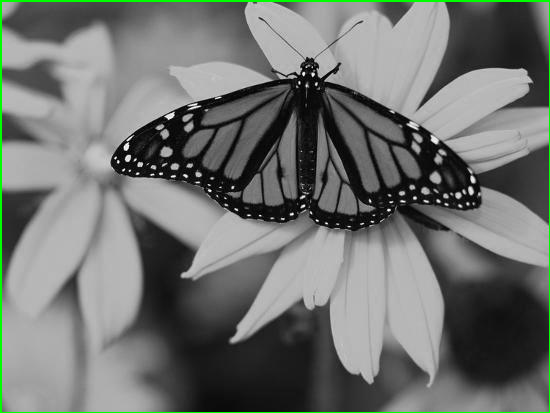

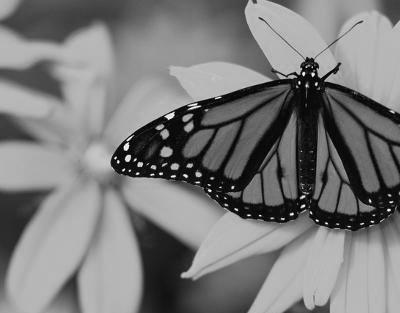

In [43]:
#5. 직사각형으로 잘라내기
#boundingRect 결과를 이용해 이미지의 ROI를 잘라 저장하거나 시각화.
from google.colab.patches import cv2_imshow

image2 = cv2.imread("gray_image.jpg", cv2.IMREAD_GRAYSCALE)
image_copy = image2.copy()
roi = image_copy[20:min(150, image_copy.shape[0]), 70:min(200, image_copy.shape[1])]

import cv2

image = cv2.imread("gray_image.jpg", cv2.IMREAD_GRAYSCALE)

contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    x, y, w, h = cv2.boundingRect(contours[0])


    roi = image[y:y+h-100, x:x+w-150]


    cv2.imwrite("roi_image.jpg", roi)


    image_copy = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2_imshow(image_copy)
    cv2_imshow(roi)
    cv2.waitKey(0)
    cv2.destroyAllWindows()